In [21]:
import sys
sys.path.append('/Users/hph/current_fits/cutout_figures/')
path = '/Users/hph/current_fits/cutout_figures/'
import numpy as np
import matplotlib.pyplot as plt
import aplpy
from astropy.io import fits
from astropy import wcs
import warnings
import regions
import pyregion
from astropy.utils.console import ProgressBar

def cutout(inputfile, xcenter, ycenter, width, height, cdelt = '', ranges = False, outfile = ''):

    ### This function creates a new fits file based on rectangular region information.
    ### xcenter, ycenter are the centers of the region in galactic longitude and latitude in degrees
    ### width and height are similarly longitude and latitude measurements in degrees
    
    path = '/Users/hph/current_fits/cutout_figures/'
    w = wcs.WCS(path+inputfile).celestial
    data, header = fits.getdata(path+inputfile, header = True)
        
    #if (header['CRVAL1'] != 0) or (header['CRVAL2'] != 0):
    #    raise ValueError('\nThe input CRVAL is not 0!\n')
    

    centre_x, centre_y = w.wcs_world2pix(xcenter, ycenter, 1)
    #print centre_x
    #print centre_y

    centre_x = int(centre_x)
    centre_y = int(centre_y)
    
    
    if cdelt == '':
        cdelt = np.mean( [np.absolute(header['CDELT1']), np.absolute(header['CDELT2'])] )
    cdelt = cdelt
        
        
    size_pixels_x = int(np.rint((width / 2.) / cdelt))
    size_pixels_y = int(np.rint((height / 2.) / cdelt))

    
    delta_y = np.array([centre_x - size_pixels_x, centre_x + size_pixels_x], dtype = int)
    delta_x = np.array([centre_y - size_pixels_y, centre_y + size_pixels_y], dtype = int)
    
    centre_x_new, centre_y_new  = w.wcs_pix2world( delta_y[0], delta_x[0], 1)
        
    data_cutout = data[ delta_x[0]: delta_x[1], delta_y[0]: delta_y[1] ]

    centre_x = ((delta_x[1] - delta_x[0]) / 2.) + delta_x[0]
    centre_y = ((delta_y[1] - delta_y[0]) / 2.) + delta_y[0]

    # centre_x_new, centre_y_new  = ((delta_x[1] - delta_x[0]) / 2.), ((delta_y[1] - delta_y[0]) / 2.)
    # centre_x_new_world, centre_y_new_world, velo  = w.wcs_pix2world(centre_y, centre_x, 0, 1)

    centre_x_new, centre_y_new = (header['CRPIX1'] - delta_y[0]), (header['CRPIX2'] - delta_x[0])

    if ranges: 
    
        stats = [np.nanmin(data_cutout), np.nanmax(data_cutout)]
        return stats
    
    if outfile != '':
        
        del header[29:72]
        del header['PC*']
        
        header['CRPIX1'] = size_pixels_x #float(centre_y) #_new
        header['CRPIX2'] = size_pixels_y #float(centre_x) #_new 
        header['CRVAL1'] = xcenter #float(centre_y_new_world) 
        header['CRVAL2'] = ycenter #float(centre_x_new_world)
    
        fits.writeto(path+outfile, data = data_cutout, header = header, overwrite = True)
        


def make_single(inputfits, outputfile, xcenter, ycenter, label, vmin=-1.14125e08, vmax =2.07402e+08, gamma=1.8):
    
    path = '/Users/hph/current_fits/cutout_figures/'
    
    fg_color='white'
    bg_color='black'
    fig = plt.figure(figsize=(5, 5))#,facecolor=bg_color, edgecolor=fg_color)
    subplot = aplpy.FITSFigure(inputfits, figure = fig, convention='calabretta')
    subplot.show_colorscale(vmin=vmin, vmax=vmax, stretch='power',exponent=gamma,cmap='inferno')
    #subplot.frame.set_color(fg_color)
    subplot.set_nan_color(bg_color)
    subplot.ticks.set_xspacing(0.02)
    subplot.ticks.set_yspacing(0.02)
    subplot.ticks.set_color('black')
    subplot.tick_labels.set_xformat('d.dd')
    subplot.tick_labels.set_yformat('d.dd')
    #subplot.ticks.set_color(fg_color)
    #subplot.recenter(xcenter, ycenter, width = 50. / 3600., height = 50. / 3600.)
    subplot.add_label(0.35, 0.95, str(label), relative = True, weight = 'bold', size = 10, color = 'black')
    #subplot.show_markers(xcenter, ycenter, marker = '+', facecolor = 'red', edgecolor = 'red', s = 1000)

    subplot.show_contour(path+'dendrogram_mask_pruned_rms1e7_dv3_dd1_dp50_pp6_pm2_gal_5-28-19.fits',
                         colors = 'white', levels = [0.0,1.0], linewidths = 0.7,
                         convention = 'calabretta', zorder = 10, linestyle = 'solid')
    subplot.axis_labels.set_xtext('Galactic Longitude (degrees)')
    subplot.axis_labels.set_ytext('Galactic Latitude (degrees)')
    subplot.ticks.show()
    subplot.add_scalebar(length=24./3600.)
    subplot.scalebar.set_label('1 pc')
    subplot.scalebar.set_color('white')
    #subplot.tick_labels.set_font(color=fg_color)
    #subplot.axis_labels.set_font(color=fg_color)
    #subplot.axis_labels.set_color(fg_color)
    #fig.tight_layout()
    fig.savefig(outputfile)
    plt.show()
    #plt.close('all')
    


In [54]:
cutout('Continuum_mosaic_current_no_sgra_no_IHMSFR.fits', 
       0.3781046312, 0.04874423644, 
       0.1336001, 0.0728000, 
       outfile = 'dustridge_BCD.fits')


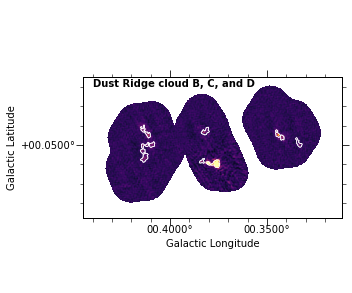

In [82]:
make_single(inputfits = path+'dustridge_BCD.fits',outputfile=path+'dustridge_BCD.pdf', 
            xcenter = 0.3781046312, ycenter = 0.04874423644, 
            label = 'Dust Ridge cloud B, C, and D')

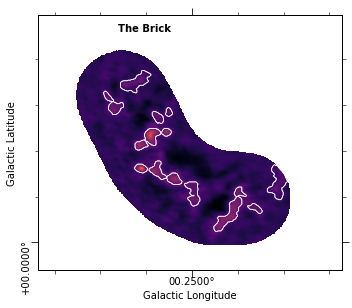

In [76]:
name = 'The Brick'
reg_outfile = 'the_brick'
reg_xcenter = 0.2504641254
reg_ycenter = 0.02171083463
reg_width = 0.0662889
reg_height = 0.0555395

cutout('Continuum_mosaic_current_no_sgra_no_IHMSFR.fits', 
       reg_xcenter, reg_ycenter, 
       reg_width, reg_height, 
       outfile = reg_outfile+'.fits')

make_single(inputfits = path+reg_outfile+'.fits',outputfile=path+reg_outfile+'.pdf', 
            xcenter = reg_xcenter, ycenter = reg_ycenter, 
            label = name)


In [2]:
def cutout_sqr(inputfile, xcenter, ycenter, side, cdelt = '', ranges = False, outfile = ''):

    ### This function creates a new fits file based on rectangular region information.
    ### xcenter, ycenter are the centers of the region in galactic longitude and latitude in degrees
    ### width and height are similarly longitude and latitude measurements in degrees
    
    path = '/Users/hph/current_fits/cutout_figures/'
    w = wcs.WCS(path+inputfile).celestial
    data, header = fits.getdata(path+inputfile, header = True)
        
    #if (header['CRVAL1'] != 0) or (header['CRVAL2'] != 0):
    #    raise ValueError('\nThe input CRVAL is not 0!\n')
    

    centre_x, centre_y = w.wcs_world2pix(xcenter, ycenter, 1)
    #print centre_x
    #print centre_y

    centre_x = int(centre_x)
    centre_y = int(centre_y)
    
    
    if cdelt == '':
        cdelt = np.mean( [np.absolute(header['CDELT1']), np.absolute(header['CDELT2'])] )
    cdelt = cdelt
        
        
    size_pixels_x = int(np.rint((side / 2.) / cdelt))
    size_pixels_y = int(np.rint((side / 2.) / cdelt))

    
    delta_y = np.array([centre_x - size_pixels_x, centre_x + size_pixels_x], dtype = int)
    delta_x = np.array([centre_y - size_pixels_y, centre_y + size_pixels_y], dtype = int)
    
    centre_x_new, centre_y_new  = w.wcs_pix2world( delta_y[0], delta_x[0], 1)
        
    data_cutout = data[ delta_x[0]: delta_x[1], delta_y[0]: delta_y[1] ]

    centre_x = ((delta_x[1] - delta_x[0]) / 2.) + delta_x[0]
    centre_y = ((delta_y[1] - delta_y[0]) / 2.) + delta_y[0]

    # centre_x_new, centre_y_new  = ((delta_x[1] - delta_x[0]) / 2.), ((delta_y[1] - delta_y[0]) / 2.)
    # centre_x_new_world, centre_y_new_world, velo  = w.wcs_pix2world(centre_y, centre_x, 0, 1)

    centre_x_new, centre_y_new = (header['CRPIX1'] - delta_y[0]), (header['CRPIX2'] - delta_x[0])

    if ranges: 
    
        stats = [np.nanmin(data_cutout), np.nanmax(data_cutout)]
        return stats
    
    if outfile != '':
        
        del header[29:72]
        del header['PC*']
        
        header['CRPIX1'] = size_pixels_x #float(centre_y) #_new
        header['CRPIX2'] = size_pixels_y #float(centre_x) #_new 
        header['CRVAL1'] = xcenter #float(centre_y_new_world) 
        header['CRVAL2'] = ycenter #float(centre_x_new_world)
    
        fits.writeto(path+outfile+'.sqr.fits', data = data_cutout, header = header, overwrite = True)

In [3]:
def make_postage(infiles, gammas, outfile, path):
    num_fig = len(infiles)
    print num_fig
    
    vmin = -1.14125e08
    vmax = 2.07402e+08
    
    #fig = plt.figure(figsize=(7,7))#figsize=(15, 7))
    fig, ((ax0,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8)) = plt.subplots(nrows=3,ncols=3)
    ax_arr = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
    
    i = 4
    j = (num_fig/i)
    print j
    for fig_i in range(num_fig):
        f1 = aplpy.FITSFigure(path+infiles[fig_i]+'.sqr.fits', figure=ax_arr[fig_i], convention='calabretta') #subplot=(j,i,fig_i+1)
        f1.ticks.set_xspacing(0.07)
        f1.ticks.set_yspacing(0.07)
        f1.ticks.set_color('black')
        f1.tick_labels.set_xformat('dd.ddd')
        f1.tick_labels.set_yformat('dd.ddd')
        f1.show_colorscale(vmin=vmin, vmax=vmax, stretch='power',exponent=gammas[fig_i],cmap='inferno')
        
    fig.tight_layout()
    fig.savefig(path+outfile)
    
def make_rgb_groups(inputfits, rgbfits_template, inputfile_r, inputfile_g, inputfile_b,
                    outputfile, map_center, centers, labels, contourfile, cdelt = '', region_files = '',
                    edgecolor_arr = '', markers = '', upperplot_file = '', upperplot_regions = ''):

    fig = plt.figure(figsize=(6, 7))

    subplot = aplpy.FITSFigure(inputfits, figure = fig, convention='calabretta', slices = [0], subplot = (2, 1, 2) )#subplot = [0.2, 0.15, 0.7, 0.7 * ratio],
    subplot.show_colorscale(rgbpgn, interpolation='nearest')
    
    subplot.ticks.set_xspacing(0.02)
    subplot.ticks.set_yspacing(0.02)
    subplot.ticks.set_color('black')
    subplot.tick_labels.set_xformat('dd.dd')
    subplot.tick_labels.set_yformat('dd.dd')
    subplot.recenter(map_center[0], map_center[1], width = map_center[2], height = map_center[3])
    subplot.add_scalebar((1. / (8340. / 206265. ) ) / 3600., label = '1 pc', corner = 'bottom left')

    ax = fig.axes[0]
    ax.xaxis.set_ticks_position('top') 
    ax.xaxis.set_label_position('top') 
    position = ax.get_position()
    print position
    
    absolute_size = 0.07
    absolute_ratio1 = 0.8 * (map_center[2] / absolute_size)
    absolute_ratio2 = 0.8 * (map_center[3] / absolute_size)
    absolute_center = 0.55 - (absolute_ratio1  / 2)
    absolute_bottom = 0.1
    
    ax.set_position([absolute_center, 0.37, absolute_ratio1, absolute_ratio2], which = 'active')
    ax.set_anchor('S')
    position = ax.get_position()
    print position
    
    subplot_upper = aplpy.FITSFigure(upperplot_file, figure = fig, convention='calabretta', subplot = [0.13, 0.2, 0.85, 0.16])
    subplot_upper.show_colorscale(cmap = 'viridis', interpolation='nearest', stretch = 'log', vmin = 753.99469, vmid = 100, vmax = 60000)
     
    subplot_upper.ticks.set_xspacing(0.5)
    subplot_upper.ticks.set_yspacing(0.5)
    subplot_upper.ticks.set_color('black')
    subplot_upper.tick_labels.set_xformat('dd.d')
    subplot_upper.tick_labels.set_yformat('dd.d')
    subplot_upper.recenter(0.025865526,  -0.04688684, width = 3.5239389 , height = 0.64592806 )
    
    for ID in ProgressBar(range(len(upperplot_regions))):
    
        region = upperplot_regions[ID].coord_list
        subplot_upper.show_rectangles(region[0], region[1], region[2], region[3], edgecolors = 'black', alpha = 0.7, linewidth = 0.6)
    
    subplot_upper.show_rectangles(map_center[0], map_center[1], map_center[2], map_center[3], edgecolors = 'red', alpha = 0.9, linewidth = 0.6)
        
    fig.savefig(outputfile[:-4]+'_nolabels.pdf', frameon = True)
    
    lab = range(len(fig.axes))
    for x in lab:
        ax = fig.axes[x]
        for tick in ax.get_yticklabels():
            tick.set_rotation(90)
    
    for i in range(len(centers[0])):
        if (centers[0][i] < map_center[0] + (map_center[2] / 2.)) and (centers[0][i] > map_center[0] - (map_center[2] / 2.)):
            if (centers[1][i] < map_center[1] + (map_center[3] / 2.)) and (centers[1][i] > map_center[1] - (map_center[3] / 2.)):
                subplot.add_label(centers[0][i], centers[1][i], ''+str(labels[i]), weight = 'bold', size = 8, color = 'cyan', ha = 'center', va = 'center', zorder = 10)
    count = 0
    
    for file in ProgressBar(region_files):
        print file
        regions = np.genfromtxt(file, skip_header = 3, delimiter = ',', dtype = 'str')
    
        for region in regions:
    
            tmp1 = np.float(region[0].split('(')[1])
            tmp2 = np.float(region[1].split(')')[0])
    
            if (tmp1 < map_center[0] + (map_center[2] / 2.)) and (tmp1 > map_center[0] - (map_center[2] / 2.)):
                if (tmp2 < map_center[1] + (map_center[3] / 2.)) and (tmp2 > map_center[1] - (map_center[3] / 2.)):
                    subplot.show_markers(tmp1, tmp2, marker = markers[count], edgecolor = 'none', facecolor = edgecolor_arr[count], s = 100, alpha = 0.7, zorder = 1)
    
        count += 1
    
    subplot.show_contour(contourfile, colors = 'cyan', levels = [-100, 0.1], linewidths = 1, convention = 'calabretta', linestyle = '-', zorder = 10)

    
    fig.savefig(outputfile)
    plt.close('all')

In [22]:
name = 'The Brick'
reg_outfile = 'the_brick'
reg_xcenter = 0.2504641254
reg_ycenter = 0.02171083463
reg_side = 0.0662889


cutout_sqr('Continuum_mosaic_current_no_sgra_no_IHMSFR.fits', 
       reg_xcenter, reg_ycenter, reg_side, 
       outfile = reg_outfile)

In [14]:
xtarget, ytarget, starget, targetname = 0.251, 0.0217, 0.0663, 'The Brick'
a_name, a_gamma = 'the_brick', 1.8
in_array = [a_name,a_name,a_name,a_name,a_name,a_name,a_name,a_name]
in_gamma = [a_gamma,a_gamma,a_gamma,a_gamma,a_gamma,a_gamma,a_gamma,a_gamma]
make_postage(in_array,in_gamma,'test_postage.pdf',path)

8
2


AttributeError: 'AxesSubplot' object has no attribute 'subplotpars'

In [4]:
reglist = pyregion.open(path+'postage.reg')


In [5]:
reglist

[Shape : box ( Number(0.3754462177),Number(0.05035036125),Ang(476.400"),Ang(248.400"),Number(0) ),
 Shape : box ( Number(0.2496583676),Number(0.01855522186),Ang(252.720"),Ang(208.080"),Number(0) ),
 Shape : box ( Number(0.1071310649),Number(-0.08137957916),Ang(484.800"),Ang(187.200"),Number(0) ),
 Shape : box ( Number(0.4872734868),Number(0.007369831798),Ang(274.320"),Ang(320.400"),Number(0) ),
 Shape : box ( Number(1.600485158),Number(0.0166485087),Ang(231.000"),Ang(309.000"),Number(0) ),
 Shape : box ( Number(359.474226),Number(-0.1392421395),Ang(417.312"),Ang(391.392"),Number(0) )]

In [6]:
reglist[2].coord_list

[0.1071310649, -0.08137957916, 0.13466666666666666, 0.052, 0.0]

In [17]:
vmax_arr = [3.07402e+08,3.07402e+08,3.07402e+08,3.07402e+08,3.07402e+08,3.07402e+08]
gamma_arr = [1.4,1.4,1.4,1.4,1.4,1.4]
print len(vmax_arr), len(gamma_arr)

6 6


In [15]:
for reg_i in range(len(reglist)):
    reg = reglist[reg_i]
    cutout(inputfile='CMZoom_continuum_mosaic_without_sgra_pb_corrected_new.fits',
           xcenter = reg.coord_list[0], ycenter = reg.coord_list[1],
           width = reg.coord_list[2], height = reg.coord_list[3],
           outfile = "cutout_"+str(reg_i)+".fits")

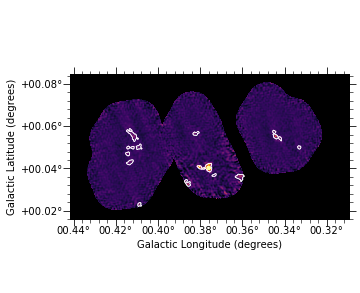

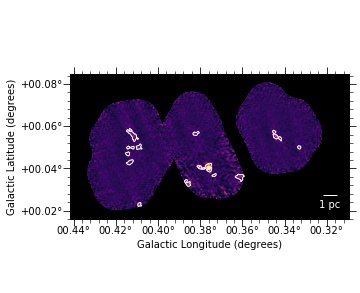

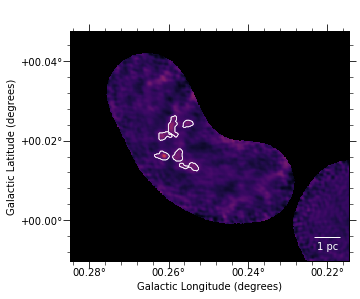

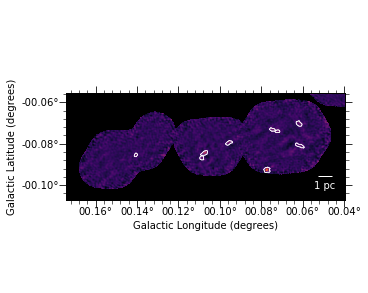

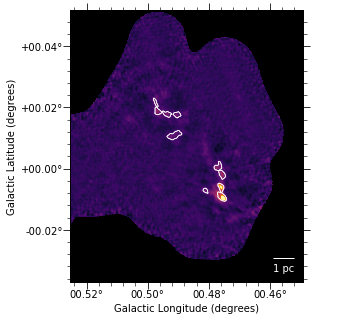

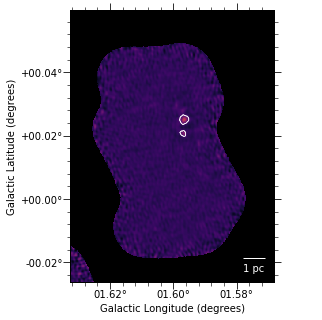

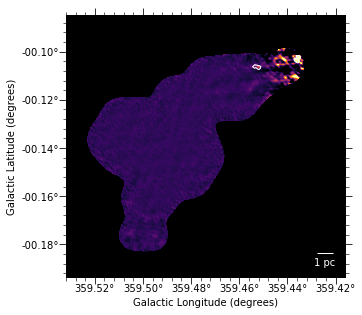

In [22]:

for reg_i in range(len(reglist)):
    make_single(inputfits = path+'cutout_'+str(reg_i)+'.fits',outputfile=path+'cutout_'+str(reg_i)+'.pdf', 
                    xcenter = reg.coord_list[0], ycenter = reg.coord_list[1], 
                    label = '',gamma=gamma_arr[reg_i],vmax =vmax_arr[reg_i])
    plt.close()